In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# defining mili and micro

m = pow(10, -3)
u = pow(10, -6)

In [3]:
# cell constant

S_kcl_handbook = 12.9 * m
S_kcl = 13.5 * m

cell_const = S_kcl_handbook / S_kcl

In [4]:
# HCl

S_h2o = 11 * u

C_hcl = np.array([0.1/i for i in [3,4,6,8]])

S = np.array([10, 8.1, 6, 4.65]) * m

landa = (S - S_h2o) * cell_const # specific conductance

mEq = 1000 * landa / C_hcl

d = {
    'C': C_hcl,
    'S': S,
    'specific_S': landa,
    'mEq': mEq,
}

data1 = pd.DataFrame(d)
data1

,C,S,specific_S,mEq
0,0.033333,0.01000,0.009545,286.351333
1,0.025000,0.00810,0.007729,309.179556
2,0.016667,0.00600,0.005723,343.369333
3,0.012500,0.00465,0.004433,354.625778


In [5]:
coefficients = np.polyfit(np.sqrt(C_hcl), mEq, 1)
line = np.poly1d(coefficients)
x_intercept = -coefficients[1] / coefficients[0]

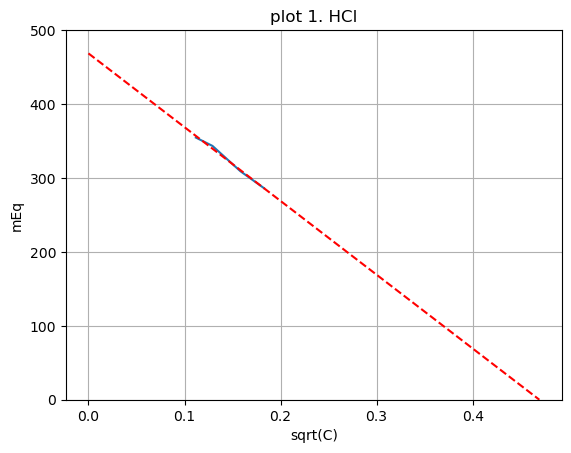

In [6]:
plt.plot(np.sqrt(C_hcl), mEq)
plt.plot(np.array([0, x_intercept]), np.array([line(0), 0]), linestyle='--', color='red')
plt.title('plot 1. HCl')
plt.xlabel('sqrt(C)')
plt.ylabel('mEq')
plt.ylim([0, 500])
plt.grid()
plt.show()

In [7]:
# limited equivalent conductance

mEq_lim = coefficients[1]
mEq_lim

468.51396298506916

In [8]:
# HAc

S_hac_handbook = 391 

C_hac = np.array([0.0008, 0.004, 0.02, 0.1])

S_hac = np.array([96.5, 140, 290, 630]) * u

landa = (S_hac - S_h2o) * cell_const

mEq2 = 1000 * landa / C_hac

alfa = mEq2 / S_hac_handbook

k = (C_hac * alfa * C_hac * alfa)/(C_hac * (1-alfa))

d2 = {
    'C': C_hac,
    'S': S_hac,
    'specific_S': landa,
    'mEq': mEq2,
    'degree of dissociation': alfa,
    'k': k,
}

data2 = pd.DataFrame(d2)
data2

,C,S,specific_S,mEq,degree of dissociation,k
0,0.0008,0.000097,0.000082,102.125000,0.261189,0.000074
1,0.0040,0.000140,0.000123,30.816667,0.078815,0.000027
2,0.0200,0.000290,0.000267,13.330000,0.034092,0.000024
3,0.1000,0.000630,0.000591,5.914889,0.015128,0.000023


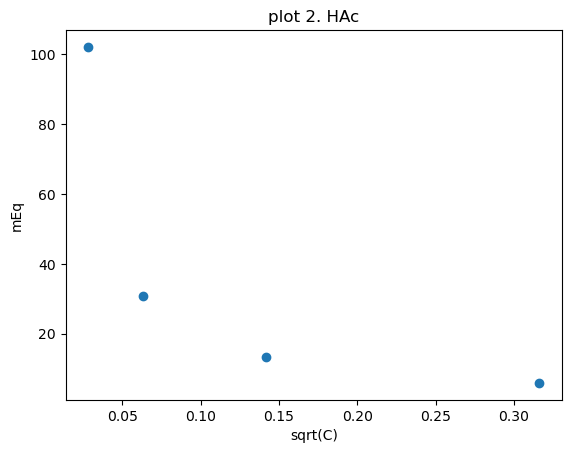

In [9]:
plt.scatter(np.sqrt(C_hac), mEq2)
plt.xlabel('sqrt(C)')
plt.ylabel('mEq')
plt.title('plot 2. HAc')
plt.show()